In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
# Load the data
file_path = r'C:\Users\Dhiraj\OneDrive\Desktop\Handwritten\A_Z Handwritten Data.csv'
data = pd.read_csv(file_path)

In [3]:
# The target variable is in the first column, and features start from the second column
X = data.iloc[:, 1:].values.reshape(-1, 28, 28, 1)  
y = data.iloc[:, 0]

# EDA

In [4]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB
None


In [5]:
# Check the first few rows of the dataset
print(data.head())


   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [6]:
# Check for missing values
print(data.isnull().sum())

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64


In [7]:
# Statistical summary of numeric columns
print(data.describe())

                   0       0.1       0.2       0.3       0.4       0.5  \
count  372450.000000  372450.0  372450.0  372450.0  372450.0  372450.0   
mean       13.523490       0.0       0.0       0.0       0.0       0.0   
std         6.740824       0.0       0.0       0.0       0.0       0.0   
min         0.000000       0.0       0.0       0.0       0.0       0.0   
25%        10.000000       0.0       0.0       0.0       0.0       0.0   
50%        14.000000       0.0       0.0       0.0       0.0       0.0   
75%        18.000000       0.0       0.0       0.0       0.0       0.0   
max        25.000000       0.0       0.0       0.0       0.0       0.0   

            0.6       0.7       0.8       0.9  ...          0.639  \
count  372450.0  372450.0  372450.0  372450.0  ...  372450.000000   
mean        0.0       0.0       0.0       0.0  ...       0.001616   
std         0.0       0.0       0.0       0.0  ...       0.490788   
min         0.0       0.0       0.0       0.0  ...       

In [8]:
print(data.columns)

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.639', '0.640', '0.641', '0.642', '0.643', '0.644', '0.645', '0.646',
       '0.647', '0.648'],
      dtype='object', length=785)


# Visualization

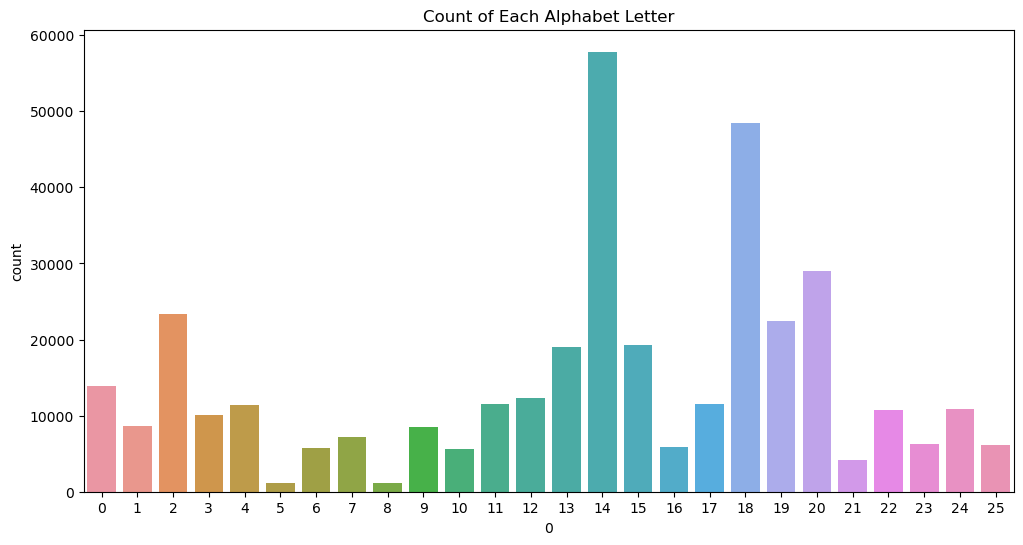

In [19]:
# Display count of each alphabet letter
plt.figure(figsize=(12, 6))
sns.countplot(x='0', data=data)
plt.title('Count of Each Alphabet Letter')
plt.show()

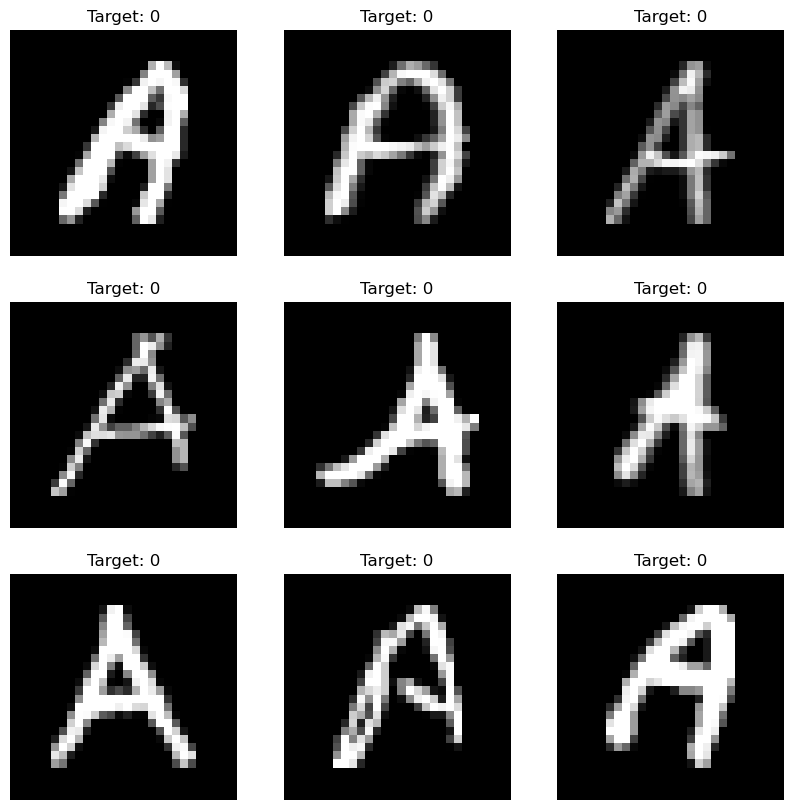

In [11]:
# Display sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[i][:, :, 0], cmap='gray')  # Assuming single-channel images
    plt.title(f'Target: {y.iloc[i]}')
    plt.axis('off')
plt.show()

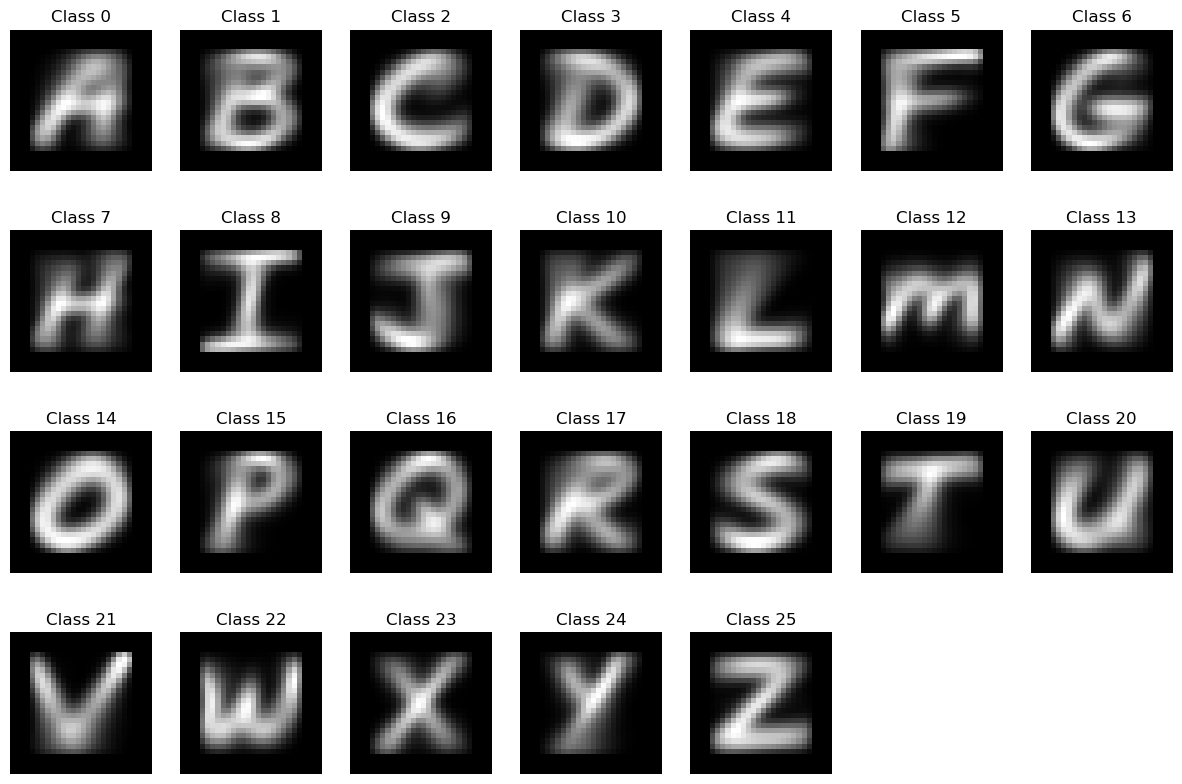

In [12]:
# Calculate average image for each class
class_avg_images = []
for label in range(26):  # Assuming 26 classes for English alphabet
    class_images = X[y == label]
    avg_image = np.mean(class_images, axis=0)
    class_avg_images.append(avg_image)

# Plot average image for each class
plt.figure(figsize=(15, 10))
for i in range(26):
    plt.subplot(4, 7, i+1)
    plt.imshow(class_avg_images[i][:, :, 0], cmap='gray')
    plt.title(f'Class {i}')
    plt.axis('off')
plt.show()


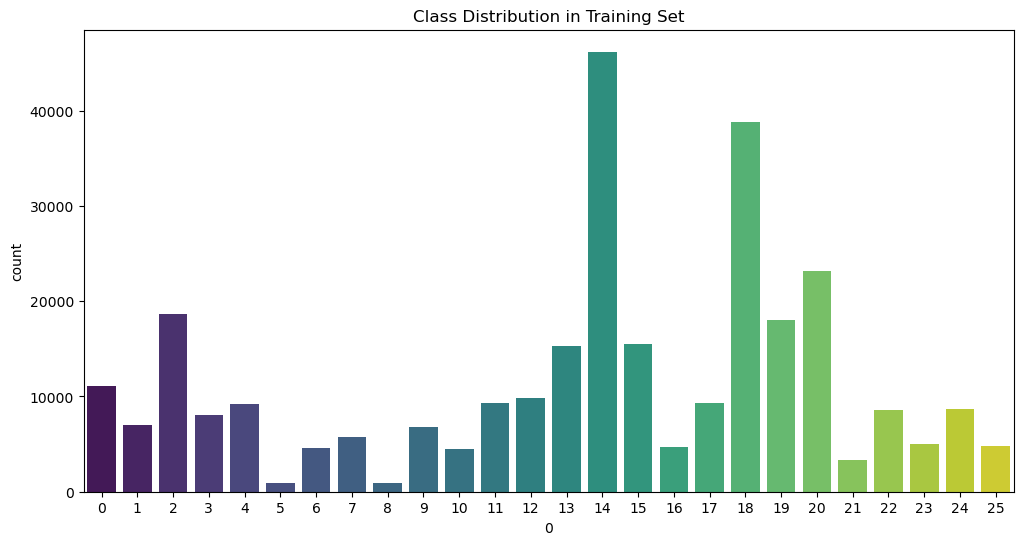

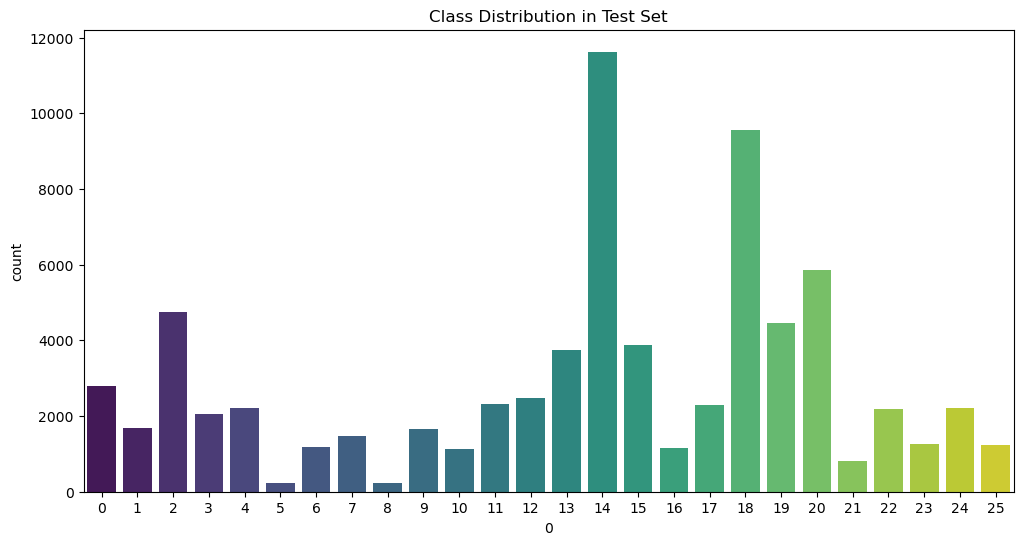

In [18]:
# Check class distribution in training set
plt.figure(figsize=(12, 6))
sns.countplot(x=train_y, palette='viridis')
plt.title('Class Distribution in Training Set')
plt.show()

# Check class distribution in test set
plt.figure(figsize=(12, 6))
sns.countplot(x=test_y, palette='viridis')
plt.title('Class Distribution in Test Set')
plt.show()


In [17]:
# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Normalize the pixel values to be between 0 and 1
train_X = train_X / 255.0
test_X = test_X / 255.0

In [16]:
# Build a Convolutional Neural Network (CNN)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')  # 26 classes for the English alphabet
])

In [17]:
# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
# Train the model
history = model.fit(train_X, train_y, epochs=10, validation_split=0.2)

Epoch 1/10
7449/7449 [==============================] - 146s 19ms/step - loss: 0.1637 - accuracy: 0.9543 - val_loss: 0.0873 - val_accuracy: 0.9751
Epoch 2/10
7449/7449 [==============================] - 133s 18ms/step - loss: 0.0655 - accuracy: 0.9813 - val_loss: 0.0661 - val_accuracy: 0.9807
Epoch 3/10
7449/7449 [==============================] - 134s 18ms/step - loss: 0.0436 - accuracy: 0.9873 - val_loss: 0.0510 - val_accuracy: 0.9859
Epoch 4/10
7449/7449 [==============================] - 135s 18ms/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.0513 - val_accuracy: 0.9857
Epoch 5/10
7449/7449 [==============================] - 132s 18ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0488 - val_accuracy: 0.9876
Epoch 6/10
7449/7449 [==============================] - 129s 17ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0616 - val_accuracy: 0.9855
Epoch 7/10
7449/7449 [==============================] - 125s 17ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0

In [19]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_X, test_y)
print(f'Test Accuracy: {test_acc}')


2328/2328 [==============================] - 8s 4ms/step - loss: 0.0576 - accuracy: 0.9907
Test Accuracy: 0.9906564354896545


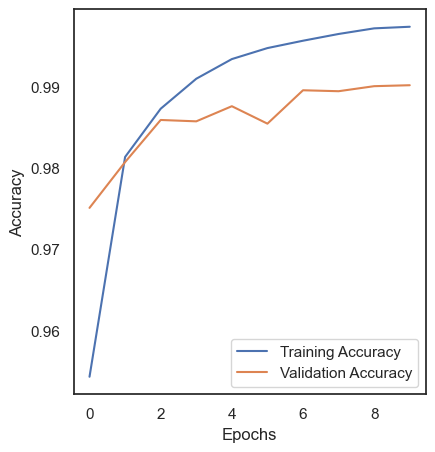

In [20]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

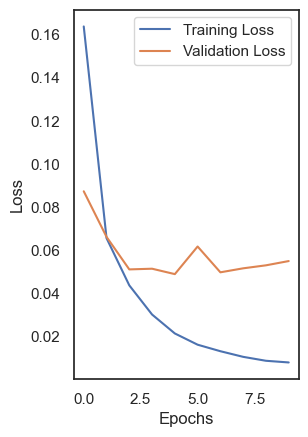

In [21]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

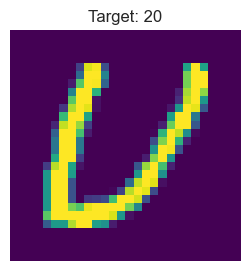

In [36]:
def plot_sample(X_test, y_test, sample_index):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_test[sample_index][:, :, 0], cmap='viridis', interpolation='nearest')
    plt.title(f'Target: {y_test.iloc[sample_index]}')
    plt.axis('off')
    plt.show()


plot_sample(test_X, test_y, 12)
